In [150]:
import sys
sys.path.append("../Network-SDE-Inference/utils")
import NeuGNN_model
import Self_func
from NeuGNN_model import *
from Self_func import *

import warnings
warnings.filterwarnings("ignore")

In [151]:
import numpy as np
import pandas as pd
import os
import torch
from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline

## Library for interaction

In [502]:
def ElementaryFunctions_Matrix(xi, xj, coupledPolyOrder = 1, CoupledPolynomialIndex = True, \
        CoupledTrigonometricIndex = True, CoupledExponentialIndex = True, CoupledFractionalIndex = True, \
            CoupledActivationIndex = True):
    
    ElementaryMatrix = pd.DataFrame()
    if CoupledPolynomialIndex == True:
        ElementaryMatrix = pd.concat([ElementaryMatrix, Coupled_Polynomial_functions(xi, xj, coupledPolyOrder)],axis=1)
    if CoupledTrigonometricIndex == True:
        ElementaryMatrix = pd.concat([ElementaryMatrix, Coupled_Trigonometric_functions(xi, xj, Sine = True, Cos = False, Tan = False)],axis=1)
    if CoupledExponentialIndex == True:
        ElementaryMatrix = pd.concat([ElementaryMatrix, Coupled_Exponential_functions(xi, xj, Exponential = True)],axis=1)
    if CoupledFractionalIndex == True:
        ElementaryMatrix = pd.concat([ElementaryMatrix, Coupled_Fractional_functions(xi, xj, Fractional = True)],axis=1)
    if CoupledActivationIndex == True:
        ElementaryMatrix = pd.concat([ElementaryMatrix, Coupled_Activation_functions(xi, xj, Sigmoid = True, Tanh = True, Hill = True)],axis=1)
   
    return ElementaryMatrix


#Libraries construction
def Coupled_Polynomial_functions(xi,xj,PolyOrder):
    if PolyOrder>=1:
        column_values = ['xj','xixj','xjMinusxi']
        CoupledPolyOne = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = xj
            if j == 1:
                tmp2 = xi*xj
            if j == 2:
                tmp3 = xj-xi
        CoupledPolyOne = np.stack((tmp1,tmp2,tmp3),axis=1)
        CoupledPolyOne = pd.DataFrame(data = CoupledPolyOne, columns = column_values)
    if PolyOrder>=2:
        column_values = ['xjpow2','xixjpow2','xjMinusxipow2']
        CoupledPolyTwo = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = xj**2
            if j == 1:
                tmp2 = (xi*xj)**2
            if j == 2:
                tmp3 = (xj-xi)**2
        CoupledPolyTwo = np.stack((tmp1,tmp2,tmp3),axis=1)
        CoupledPolyTwo = pd.DataFrame(data = CoupledPolyTwo, columns = column_values)
    if PolyOrder == 1:
        return CoupledPolyOne
    if PolyOrder == 2:
        return pd.concat([CoupledPolyOne, CoupledPolyTwo], axis=1)

def Coupled_Trigonometric_functions(xi, xj, Sine = True, Cos = False, Tan = False):
    if Sine == True:
        column_values = ['sinxj','sinxixj','sinxjMinusxi','xisinxj']
        CoupledSine = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = np.sin(xj)
            if j == 1:
                tmp2 = np.sin(xi*xj)
            if j == 2:
                tmp3 = np.sin(xj-xi)
            if j == 3:
                tmp4 = xi*np.sin(xj)
        CoupledSine = np.stack((tmp1,tmp2,tmp3,tmp4),axis=1)
        CoupledSine = pd.DataFrame(data = CoupledSine, columns = column_values)
    if Cos == True:
        column_values = ['cosxj','cosxixj','cosxjMinusxi','xicosxj']
        CoupledCosine = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = np.cos(xj)
            if j == 1:
                tmp2 = np.cos(xi*xj)
            if j == 2:
                tmp3 = np.cos(xj-xi)
            if j == 3:
                tmp4 = xi*np.cos(xj)
        CoupledCosine = np.stack((tmp1,tmp2,tmp3,tmp4),axis=1)
        CoupledCosine = pd.DataFrame(data = CoupledCosine, columns = column_values)
    if Tan == True:
        column_values = ['tanxj','tanxixj','tanxjMinusxi','xitanxj']
        CoupledTan = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = np.tan(xj)
            if j == 1:
                tmp2 = np.tan(xi*xj)
            if j == 2:
                tmp3 = np.tan(xj-xi)
            if j == 3:
                tmp4 = xi*np.tan(xj)
        CoupledTan = np.stack((tmp1,tmp2,tmp3,tmp4),axis=1)
        CoupledTan = pd.DataFrame(data = CoupledTan, columns = column_values)
    CoupledTrignometric = pd.DataFrame()
    if Sine == True:
        CoupledTrignometric = pd.concat([CoupledTrignometric,CoupledSine],axis=1)
    if Cos == True:
        CoupledTrignometric = pd.concat([CoupledTrignometric, CoupledCosine], axis=1)
    if Tan == True:
        CoupledTrignometric = pd.concat([CoupledTrignometric, CoupledTan], axis=1)
    return CoupledTrignometric

def Coupled_Exponential_functions(xi, xj, Exponential = True):
    if Exponential == True:
        column_values = ['expxj','expxixj','expxjMinusxi','xiexpxj']
        CoupledExp = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = np.exp(xj)
            if j == 1:
                tmp2 = np.exp(xi*xj)
            if j == 2:
                tmp3 = np.exp(xj-xi)
            if j == 3:
                tmp4 = xi*np.exp(xj)
        CoupledExp = np.stack((tmp1,tmp2,tmp3,tmp4),axis=1)    
        CoupledExp = pd.DataFrame(data = CoupledExp, columns = column_values)
    return CoupledExp

def Coupled_Fractional_functions(xi, xj, Fractional = True):
    if Fractional == True:
        column_values = ['fracxj','fracxixj','fracxjMinusxi','xifracxj']
        CoupledFraction = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = 1/xj
            if j == 1:
                tmp2 = 1/(xi*xj)
            if j == 2:
                tmp3 = 1/((xj-xi)+1e-5)
            if j == 3:
                tmp4 = xi/(xj+1e-5)
        CoupledFraction = np.stack((tmp1,tmp2,tmp3,tmp4),axis=1) 
        CoupledFraction = pd.DataFrame(data = CoupledFraction, columns = column_values)
    return CoupledFraction

def sigmoidfun(x,alpha,beta):
    sigmoidOutput = 1/(1+np.exp(-alpha*(x-beta)))
    return sigmoidOutput

def tangentH(x):
    Tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return Tanh

def Hill_func(x,gamma):
    Regulation_result = (x**gamma)/(x**gamma+1)
    return Regulation_result

def Coupled_Activation_functions(xi, xj, Sigmoid = True, Tanh = True, Hill = True):
    if Sigmoid == True:
        column_values = ['sigmoidxj','sigmoidxixj','sigmoidXjMinusXi','xisigmoidxj']
        #column_values = ['sigmoidxj','sigmoidxixj','sigmoidXjMinusXi','xisigmoidxj',
                        #'sigmoidxj101','sigmoidxixj101','sigmoidXjMinusXi101','xisigmoidxj101']
        CoupledSigmoid = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = sigmoidfun(xj,1,0)
            if j == 1:
                tmp2 = sigmoidfun(xi*xj,1,0)
            if j == 2:
                tmp3 = sigmoidfun(xj-xi,1,0)
            if j == 3:
                tmp4 = sigmoidfun(xj,1,0)*xi
            if j == 4:
                tmp5 = sigmoidfun(xj,10,1)
            if j == 5:
                tmp6 = sigmoidfun(xi*xj,10,1)
            if j == 6:
                tmp7 = sigmoidfun(xj-xi,10,1)
            if j == 7:
                tmp8 = sigmoidfun(xj,10,1)*xi
        CoupledSigmoid = np.stack((tmp1,tmp2,tmp3,tmp4),axis=1)
        #CoupledSigmoid = np.stack((tmp1,tmp2,tmp3,tmp4,tmp5,tmp6,tmp7,tmp8),axis=1)
        CoupledSigmoid = pd.DataFrame(data = CoupledSigmoid, columns = column_values)
    if Tanh == True:
        column_values = ['tanhxj','tanhxixj','tanhxjMinusxi','xitanhxj']
        CoupledTanh = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = tangentH(xj)
            if j == 1:
                tmp2 = tangentH(xi*xj)
            if j == 2:
                tmp3 = tangentH(xj-xi)
            if j == 3:
                tmp4 = tangentH(xj)*xi
        Coupledtanh = np.stack((tmp1,tmp2,tmp3,tmp4),axis=1)
        Coupledtanh = pd.DataFrame(data = Coupledtanh, columns = column_values)
    if Hill == True:
        column_values = ['hillxj','hillxixj','hillxjMinusxi','xihillxj','hillxj2',
                        'hillxixj2','hillxjMinusxi2','hillxj5','hillxixj5','hillxjMinusxi5']
        CoupledHill = np.zeros(shape=(np.size(xi,0),len(column_values)))
        for j in range(len(column_values)):
            if j == 0:
                tmp1 = Hill_func(xj,1)
            if j == 1:
                tmp2 = Hill_func(xi*xj,1)
            if j == 2:
                tmp3 = Hill_func(xj-xi,1)
            if j == 3:
                tmp4 = Hill_func(xj,1)*xi
            if j == 4:
                tmp5 = Hill_func(xj,2)
            if j == 5:
                tmp6 = Hill_func(xi*xj,2)
            if j == 6:
                tmp7 = Hill_func(xj-xi,2)
            if j == 7:
                tmp8 = Hill_func(xj,5)
            if j == 8:
                tmp9 = Hill_func(xi*xj,5)
            if j == 9:
                tmp10 = Hill_func(xj-xi,5)
        CoupledHill = np.stack((tmp1,tmp2,tmp3,tmp4,tmp5,tmp6,tmp7,tmp8,tmp9,tmp10),axis=1)
        CoupledHill = pd.DataFrame(data = CoupledHill, columns = column_values)
    #return CoupledSigmoid
    return pd.concat([CoupledSigmoid,Coupledtanh,CoupledHill], axis = 1) 


## Seeking process

In [612]:
Retro = pd.read_csv('tauPath_interaction_new.csv',encoding='utf-8')

In [613]:
# ignore no interaction edges' information
columns_to_check = ['wr', 'wa', 'we']
condition = Retro[columns_to_check].eq(0).any(axis=1)
rows_to_delete = Retro[condition]
Retro = Retro.drop(rows_to_delete.index)

In [614]:
xi = Retro['x2'].values
xj = Retro['wr'].values
Matrix = ElementaryFunctions_Matrix(xi,xj,CoupledPolynomialIndex = True, \
        CoupledTrigonometricIndex = False, CoupledExponentialIndex = True, CoupledFractionalIndex = False, \
            CoupledActivationIndex = True)

In [615]:
Matrix = Matrix.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [616]:
# xi and xj are different dimensions, i.e. concentration and length(weight), 
#we should ignore the unreasonable elementary functions, for example, the linear combination (xj-xi)

#columns_to_delete = Matrix.columns[Matrix.columns.str.contains('xjMinusxi')] #this will give an alternative answer, we choose the interpretable one
columns_to_delete = Matrix.columns[Matrix.columns.str.contains('xixj|xjMinusxi')]
columns_without_xi = Matrix.columns[~Matrix.columns.str.contains('xi')] #drop the terms without xj
columns_to_delete = columns_to_delete.union(columns_without_xi)
Matrix = Matrix.drop(columns=columns_to_delete)

In [617]:
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LassoLarsCV 
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error 

In [618]:
goal = Retro['er'].values.reshape(-1,1)
goal = pd.DataFrame(data = goal, columns =['er'])

In [619]:
X = Matrix.copy()
y = goal.copy()

In [620]:
X_mat = X.values 
y_mat = y.values
x_norml1 = []
y_norml1 = []
num = np.shape(X_mat)[1]
num2 = 1
L = np.shape(X_mat)[0]

for i in range(0,num):
    x_norml1.append(sum(abs(X_mat[:,i])))

for i in range(0,num2):
    y_norml1.append(sum(abs(y_mat[:,i])))

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X[X.columns] = normalize(X[X.columns], norm='l1', axis=0)*L
y[y.columns] = normalize(y[y.columns], norm='l1', axis=0)*L

X_col = X.columns 
Xin = X.iloc[:,:]
out = np.array(y)
y1 = (out[:,0])

In [621]:
reg1 = LassoCV(cv=5, fit_intercept=True, n_jobs=-1, max_iter=10000).fit(Xin,y1)
print(reg1.score(Xin,y1))
print('Best threshold: %.3f' % reg1.alpha_)

0.9210412584845744
Best threshold: 0.009


In [622]:
for i in range(len(reg1.coef_)):
        reg1.coef_[i] = reg1.coef_[i]*y_norml1[0]/x_norml1[i]

In [623]:
coef1 = pd.Series(reg1.coef_, index = X_col)
imp_ = pd.concat([coef1.sort_values(key=abs).head(int(0)),
                     coef1.sort_values(key=abs).tail(int(10))])
imp_cons = imp_ + (1e-10)
imp_cons['constant'] = reg1.intercept_*y_norml1[0]/L
print("Elementary functions discovered by Phase 1 with constant.")
print(imp_cons)

Elementary functions discovered by Phase 1 with constant.
xiexpxj        0.007526
xitanhxj      -0.033296
xihillxj       0.038416
xisigmoidxj   -0.042444
constant      -0.001031
dtype: float64


In [624]:
from math import log
def calculate_aic(n,mse,num_params):
    aic = n * log(mse) + 2 * num_params 
    return aic 

In [625]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
def terms_sort_fit(X_lib,Y_goal,intercept):
    reg = LinearRegression(fit_intercept=intercept).fit(X_lib,Y_goal)
#     print(X_lib.columns)
#     print(reg.coef_)
#     if intercept == True:
#         coef['constant'] = reg.intercept_
#         num_params = len(coef)
#     else:
#         num_params = len(coef) 
    num_params = X_lib.shape[1]
    P = X_lib
    Score = reg.score(X_lib,Y_goal)
    yhat = reg.predict(P)
    mse = mean_squared_error(Y_goal, yhat)
    aic = calculate_aic(len(Y_goal), mse, num_params)
    #print('label of function: %.3f' % time)
    #sort = coef.sort_values()
    return Score, mse, aic

In [626]:
X = pd.DataFrame()
Score_list = np.zeros(shape=(imp_cons.shape[0],1))
MSE_list = np.zeros(shape=(imp_cons.shape[0],1))
AIC_list = np.zeros(shape=(imp_cons.shape[0],1))
y = goal.copy()
for i in range(1,imp_cons.shape[0]+1):
    if imp_cons.index[-i] != 'constant':
        tmp = Matrix.copy()[imp_cons.index[-i]]
        if i == 1:
            X = Matrix.copy()[imp_cons.index[-i]].values.reshape(-1,1)
            X = pd.DataFrame(X)
        else:
            X = pd.concat([X,tmp],axis=1)
    else:
        Cons = np.ones((y1.shape[0],1))*imp_cons['constant']
        X = pd.DataFrame(Cons)
    Score, mse, aic = terms_sort_fit(X,y,False)
    Score_list[i-1] = Score
    MSE_list[i-1] = mse
    AIC_list[i-1] = aic
    print(Score, mse, aic,imp_cons.index[-i])

2.220446049250313e-16 6.242848928286471e-06 -596804.8812535506 constant
0.894500828401448 6.586153903491315e-07 -708805.6797300654 xisigmoidxj
0.908998315478682 5.681097686861735e-07 -716165.3688719351 xihillxj
0.9091071733588427 5.674301853856766e-07 -716222.9762019701 xitanhxj
0.9226432175481626 4.829267064251428e-07 -724251.3668787471 xiexpxj


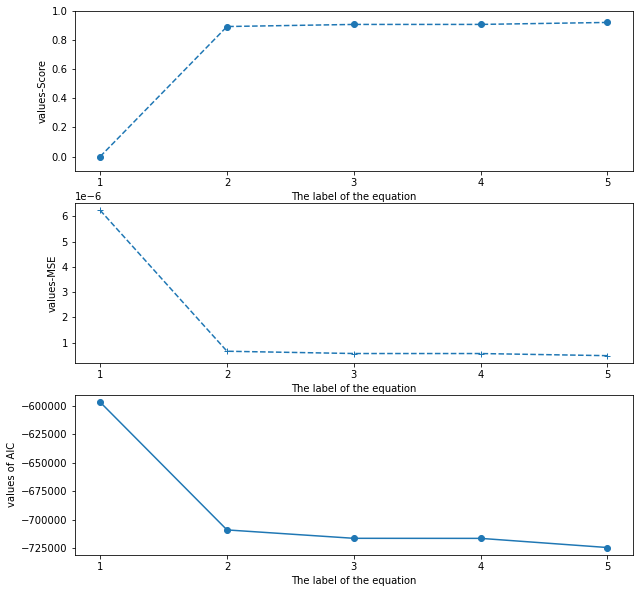

In [627]:
# Visualization
Index = np.arange(1,imp_cons.shape[0]+1,1)
fig = plt.figure(figsize=(10,10))
fig.add_subplot(3,1,1)
l1, = plt.plot(Index,Score_list, marker='o', linestyle='dashed')
plt.xticks(Index)
plt.xlabel('The label of the equation')
plt.ylabel('values-Score')
plt.ylim(-0.1, 1)  
fig.add_subplot(3,1,2)
l2, = plt.plot(Index,MSE_list, marker='+', linestyle='dashed')
plt.xticks(Index)
plt.xlabel('The label of the equation')
plt.ylabel('values-MSE')
fig.add_subplot(3,1,3)
l3, = plt.plot(Index,AIC_list, marker='o')
plt.xticks(Index)
plt.xlabel('The label of the equation')
plt.ylabel('values of AIC')
plt.savefig('/Users/lanag/Downloads/Functions_retrograde.pdf', format='pdf')
plt.show()

In [628]:
xi = Retro['x2'].values
xj = Retro['wr'].values
Matrix = ElementaryFunctions_Matrix(xi,xj)
Matrix = Matrix.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
goal = Retro['er'].values.reshape(-1,1)
goal = pd.DataFrame(data = goal, columns =['er'])
for index, element in imp_cons.iteritems():
    if index != 'constant':
        Xfind = Matrix[index].values.reshape(-1,1)
        model_linear = LinearRegression(fit_intercept=True)
        model_linear.fit(Xfind,goal)
        a = model_linear.coef_
        print("Function:", index, "Coefficient:", a, "Constant:", model_linear.intercept_, "Regression score:", model_linear.score(Xfind, goal) )

Function: xiexpxj Coefficient: [[-0.00800306]] Constant: [-0.00112723] Regression score: 0.6966751591355521
Function: xitanhxj Coefficient: [[-0.02807211]] Constant: [-0.00130271] Regression score: 0.3266884552500936
Function: xihillxj Coefficient: [[-0.04518424]] Constant: [-0.00126864] Regression score: 0.4004213130193336
Function: xisigmoidxj Coefficient: [[-0.02487682]] Constant: [-0.00103861] Regression score: 0.894500828401448


### Choose function depending on the complexity

In [ ]:
# especially for Euclidean-interaction
# Depending on the function's complexity

### Final fine-tuing regression

In [365]:
xi = Retro['x2'].values
xj = Retro['wr'].values
Matrix = ElementaryFunctions_Matrix(xi,xj)
Matrix = Matrix.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
goal = Retro['er'].values.reshape(-1,1)
goal = pd.DataFrame(data = goal, columns =['er'])
Xfind = Matrix['xisigmoidxj'].values.reshape(-1,1)
model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(Xfind,goal)
a = model_linear.coef_
print("Coefficient:", a, "Constant:", model_linear.intercept_, "Regression score:", model_linear.score(Xfind, goal) )

Coefficient: [[-0.02487682]] Constant: [-0.00103861] Regression score: 0.894500828401448


In [366]:
Cr = model_linear.intercept_

### anterograde

In [367]:
xi = Retro['x2'].values
xj = Retro['wa'].values
# xi = bestMe['x1'].values
# xj = bestMe['x2'].values
Matrix = ElementaryFunctions_Matrix(xi,xj)
Matrix = Matrix.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
#goal = bestMe_excit['e0'].values.reshape(-1,1)
goal = Retro['ea'].values.reshape(-1,1)
goal = pd.DataFrame(data = goal, columns =['ea'])
X = Matrix.copy()
y = goal.copy()
Xfind = X['xisigmoidxj']
Xfind = Xfind.values.reshape(-1,1)
yfind = y['ea']
vmodel_linear = LinearRegression(fit_intercept=True)
model_linear.fit(Xfind,yfind)
a = model_linear.coef_
print("Coefficient:", a, "Constant:", model_linear.intercept_, "Regression score:", model_linear.score(Xfind, goal)) 

Coefficient: [0.02366924] Constant: 0.02650292598808541 Regression score: 0.8563454675620041


In [368]:
Ca = model_linear.intercept_

### Euclidean

In [369]:
xi = Retro['x2'].values
xj = Retro['we'].values
Matrix = ElementaryFunctions_Matrix(xi,xj)
Matrix = Matrix.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
goal = Retro['ee'].values.reshape(-1,1)
goal = pd.DataFrame(data = goal, columns =['ee'])
X = Matrix.copy()
y = goal.copy()
Xfind = X['xiexpxj']
Xfind = Xfind.values.reshape(-1,1)
yfind = y['ee']
model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(Xfind,yfind)
a = model_linear.coef_
print("Coefficient:", a, "Constant:", model_linear.intercept_, "Regression score:", model_linear.score(Xfind, goal)) 

Coefficient: [0.0020781] Constant: -0.025506557530099037 Regression score: 0.9885171454804416


In [370]:
Ce = model_linear.intercept_

In [339]:
best_selfDyn = pd.read_csv('/Users/lanag/Downloads/tauPath_self_new.csv')

TimeSeries = best_selfDyn['x'].values
TimeSeries = TimeSeries.reshape(-1,1)
self_matrix = self_ElementaryFunctions_Matrix(TimeSeries, 1, 4, PolynomialIndex = True, TrigonometricIndex = False, \
ExponentialIndex = True, FractionalIndex = False, ActivationIndex = False)
self_matrix = self_matrix.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
goal = best_selfDyn['s1'].values
goal = pd.DataFrame(data = goal, columns =['s1'])
X = self_matrix.copy()
y = goal.copy()

In [340]:
X_mat = X.values 
y_mat = y.values
x_norml1 = []
y_norml1 = []
num = np.shape(X_mat)[1]
num2 = 1
L = np.shape(X_mat)[0]

for i in range(0,num):
    x_norml1.append(sum(abs(X_mat[:,i])))

for i in range(0,num2):
    y_norml1.append(sum(abs(y_mat[:,i])))

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X[X.columns] = normalize(X[X.columns], norm='l1', axis=0)*L
y[y.columns] = normalize(y[y.columns], norm='l1', axis=0)*L

X_col = X.columns 
Xin = X.iloc[:,:]
out = np.array(y)
y1 = (out[:,0])

In [341]:
reg1 = LassoCV(cv=8, fit_intercept=False, n_jobs=-1, max_iter=1000, normalize=False).fit(Xin,y1)
print(reg1.score(Xin,y1))
print('Best threshold: %.3f' % reg1.alpha_)

0.9999560706540178
Best threshold: 0.026


In [342]:
for i in range(len(reg1.coef_)):
    reg1.coef_[i] = reg1.coef_[i]*y_norml1[0]/x_norml1[i]
coef1 = pd.Series(reg1.coef_, index = X_col)
imp_coef1 = pd.concat([coef1.sort_values(key=abs).head(int(0)),
                     coef1.sort_values(key=abs).tail(int(10))])
imp_cons = imp_coef1 + (1e-10)
print("Elementary functions discovered by Phase 1 without constant.")
print(imp_cons)

Elementary functions discovered by Phase 1 without constant.
x1x1x1x1    1.000000e-10
x1x1x1      9.999999e-11
x1x1        9.999695e-11
expx1      -1.002354e-03
x1         -7.171158e-02
dtype: float64


In [343]:
X = pd.DataFrame()
Score_list = np.zeros(shape=(imp_cons.shape[0],1))
MSE_list = np.zeros(shape=(imp_cons.shape[0],1))
AIC_list = np.zeros(shape=(imp_cons.shape[0],1))
y = goal.copy()
for i in range(1,imp_cons.shape[0]+1):
    if imp_cons.index[-i] != 'constant':
        tmp = self_matrix.copy()[imp_cons.index[-i]]
        if i == 1:
            X = self_matrix.copy()[imp_cons.index[-i]].values.reshape(-1,1)
            X = pd.DataFrame(X)
        else:
            X = pd.concat([X,tmp],axis=1)
    else:
        Cons = np.ones((y1.shape[0],1))*imp_cons['constant']
        X = pd.DataFrame(Cons)
    Score, mse, aic = terms_sort_fit(X,y,False)
    Score_list[i-1] = Score
    MSE_list[i-1] = mse
    AIC_list[i-1] = aic
    print(Score, mse, aic,imp_cons.index[-i])

0.9910464004320751 1.131812458060578e-06 -22003913.424881414 x1
1.0 2.3772328736517557e-22 -80019007.46610066 expx1
1.0 2.3772328735900253e-22 -80019005.4661424 x1x1
1.0 2.3772328738291035e-22 -80019003.46598077 x1x1x1
1.0 2.377232872649914e-22 -80019001.46677794 x1x1x1x1


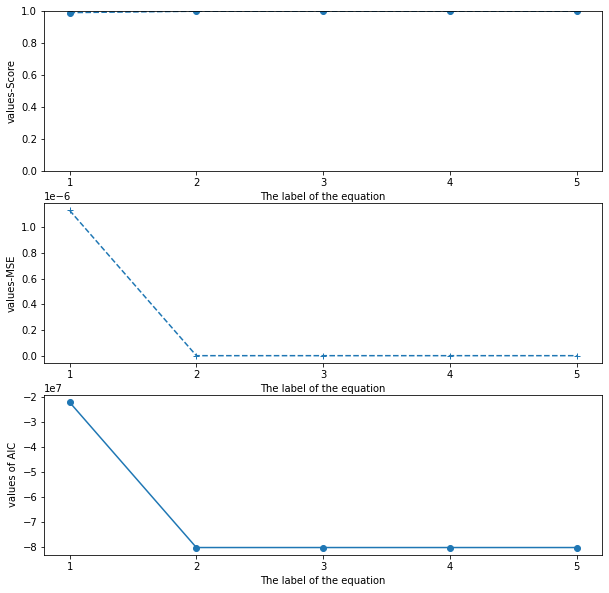

In [344]:
# Visualization
Index = np.arange(1,imp_cons.shape[0]+1,1)
fig = plt.figure(figsize=(10,10))
fig.add_subplot(3,1,1)
l1, = plt.plot(Index,Score_list, marker='o', linestyle='dashed')
plt.xticks(Index)
plt.xlabel('The label of the equation')
plt.ylabel('values-Score')
plt.ylim(0, 1) 
fig.add_subplot(3,1,2)
l2, = plt.plot(Index,MSE_list, marker='+', linestyle='dashed')
plt.xticks(Index)
plt.xlabel('The label of the equation')
plt.ylabel('values-MSE')
fig.add_subplot(3,1,3)
l3, = plt.plot(Index,AIC_list, marker='o')
plt.xticks(Index)
plt.xlabel('The label of the equation')
plt.ylabel('values of AIC')
plt.show()

In [345]:
TimeSeries = best_selfDyn['x'].values
TimeSeries = TimeSeries.reshape(-1,1)
self_matrix = self_ElementaryFunctions_Matrix(TimeSeries, 1, 4, PolynomialIndex = True, TrigonometricIndex = False, \
ExponentialIndex = True, FractionalIndex = False, ActivationIndex = False)
self_matrix = self_matrix.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
goal = best_selfDyn['s1'].values
goal = pd.DataFrame(data = goal, columns =['s1'])
X = self_matrix.copy()
y = goal.copy()
Xfind = X['x1'].values.reshape(-1,1)#pd.concat([v1,v2],axis=1)
yfind = y['s1']

In [346]:
model_linear = LinearRegression(fit_intercept=False)
model_linear.fit(Xfind,yfind)
a = model_linear.coef_

In [347]:
print("Coefficient:", a, "Regression score:", model_linear.score(Xfind, goal)) 

Coefficient: [-0.07451057] Regression score: 0.9910464004320751


In [371]:
all_cons = Cr+Ca+Ce

In [372]:
all_cons #can be ignored

array([-4.2243671e-05])